<a href="https://colab.research.google.com/github/marcabergeron/CNN-Project/blob/main/Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import zipfile
from pathlib import Path


folder = Path("Data/")
print(folder / "animal.zip")

Data/animal.zip


In [ ]:
import requests
import zipfile
from pathlib import Path
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "images"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)


with zipfile.ZipFile("drive/MyDrive/Colab Notebooks/Project_CNN/Images/animal_10 (2).zip", "r") as zip_ref:
        print("Unzipping animal images...")
        zip_ref.extractall(image_path)
        print("Downloading animal images...")

data/images directory exists.
Unzipping animal images...


# Nouvelle section

In [ ]:
with open(folder / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

In [ ]:
with zipfile.ZipFile(folder / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(folder / "pizza_steak_sushi")

Unzipping pizza, steak, sushi data...


In [ ]:
with zipfile.ZipFile("Data/animal_10.zip", "r") as zip_ref:
  zip_ref.extractall(folder)


[PosixPath('Data/animal_10 (2)/raw-img/pecora/eb32b4062afc1c22d2524518b7444f92e37fe5d404b0144390f8c078a1ebb2_640.jpg'), PosixPath('Data/animal_10 (2)/raw-img/pecora/OIP-vdQbmMeJtO534JFNjZYaTgHaFj.jpeg'), PosixPath('Data/animal_10 (2)/raw-img/pecora/OIP-0m52sfKRaqLuagHbfRHqgQHaIp.jpeg'), PosixPath('Data/animal_10 (2)/raw-img/pecora/OIP-Ll9gVVq52zTtuLmQUeoefQHaFk.jpeg'), PosixPath('Data/animal_10 (2)/raw-img/pecora/OIP-P9NVzibes5Jji8rKntpdPAAAAA.jpeg'), PosixPath('Data/animal_10 (2)/raw-img/pecora/OIP-y7PQi9MNrhQFZuDIA3O_1wHaFj.jpeg'), PosixPath('Data/animal_10 (2)/raw-img/pecora/OIP-MkR6bt5wdeUAwtefdpK2eQHaEs.jpeg'), PosixPath('Data/animal_10 (2)/raw-img/pecora/OIP-lLgci1j3s-6OeozvPWFbSgHaGt.jpeg'), PosixPath('Data/animal_10 (2)/raw-img/pecora/OIP-ANdceeThLXSa0UvoxbEwTAHaFj.jpeg'), PosixPath('Data/animal_10 (2)/raw-img/pecora/OIP-Yc4SDPQlsdGSsCmGjxFlvQHaE6.jpeg'), PosixPath('Data/animal_10 (2)/raw-img/pecora/OIP-GbqsrSbGP-2z9mgHUGPRzgHaFW.jpeg'), PosixPath('Data/animal_10 (2)/raw-img/pe

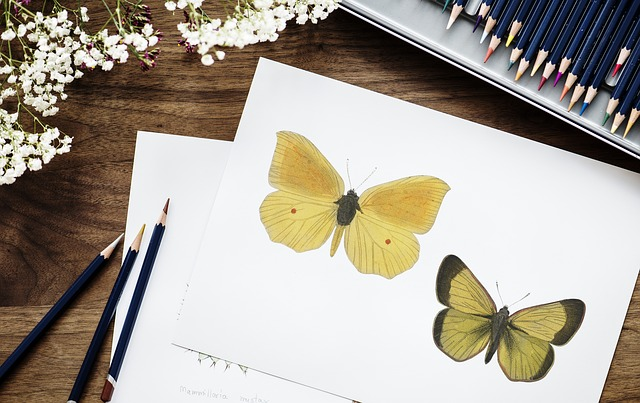

In [ ]:
import random
from PIL import Image

# Set seed
#random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path = Path("Data/animal_10 (2)/raw-img")
image_path_list = list(image_path.glob("*/*.*"))

print(image_path_list)
# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

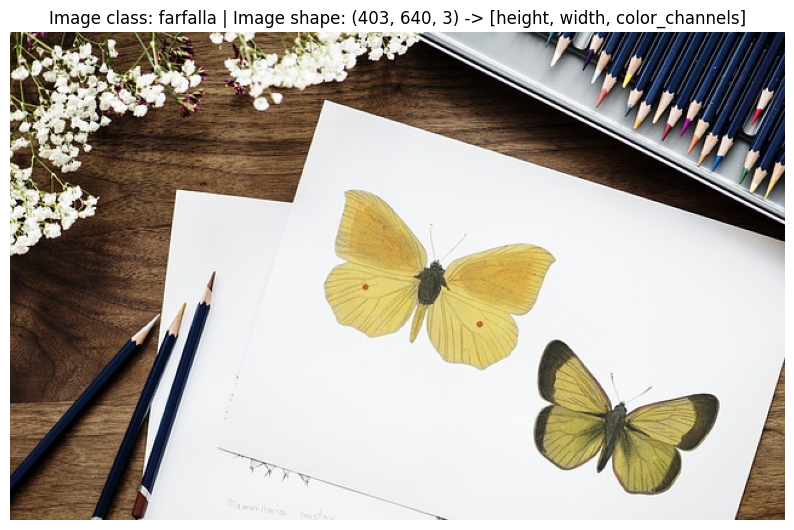

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

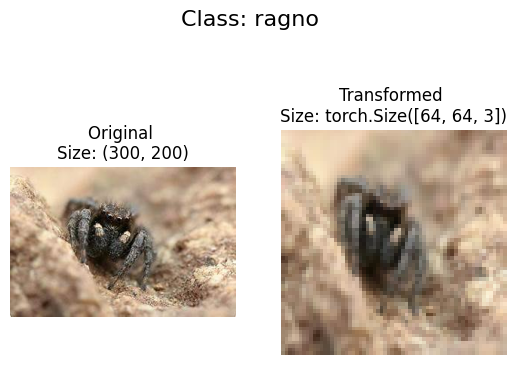

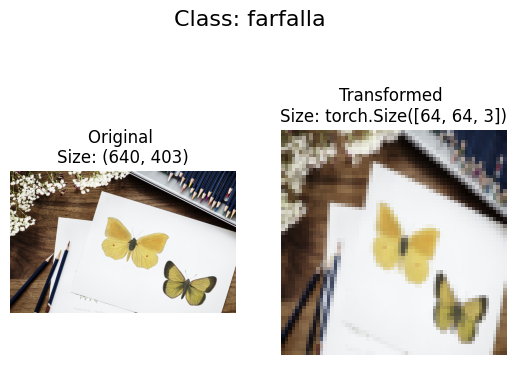

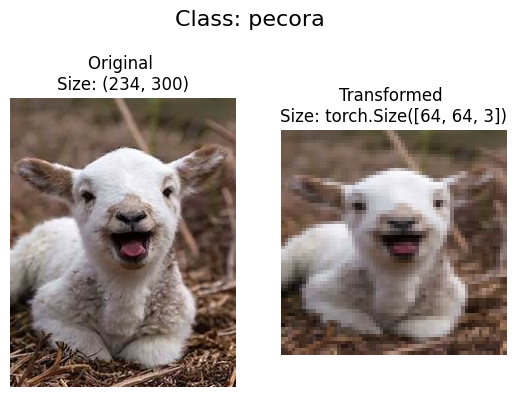

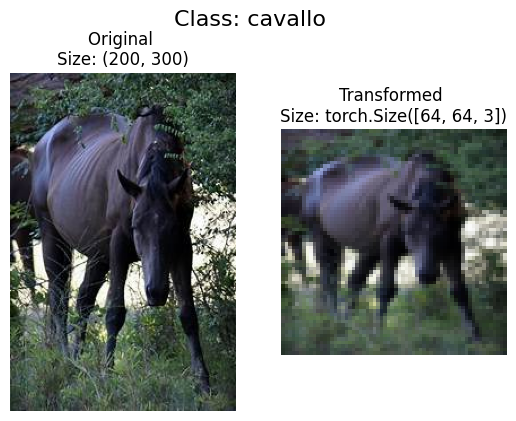

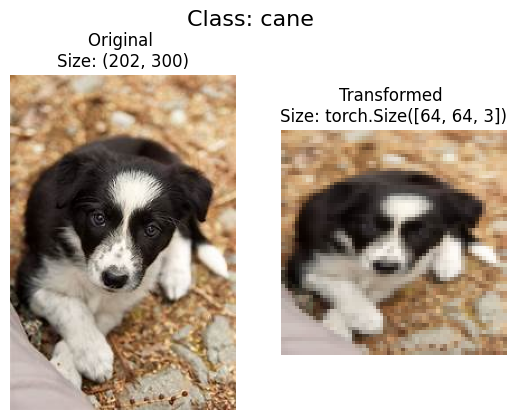

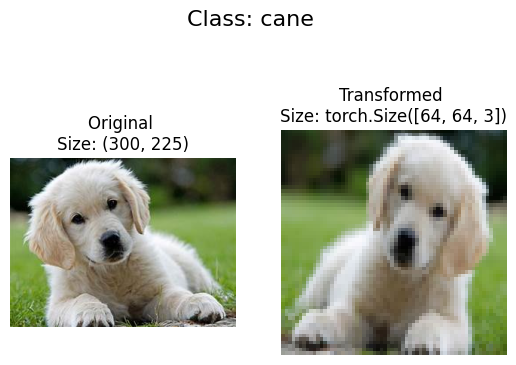

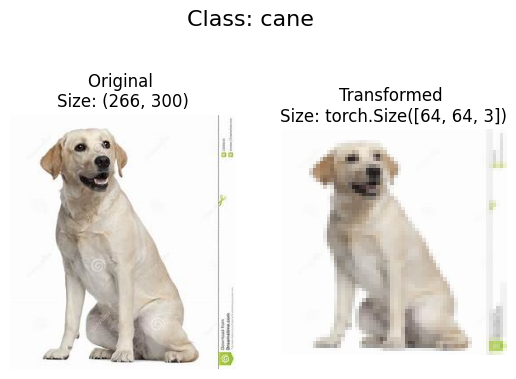

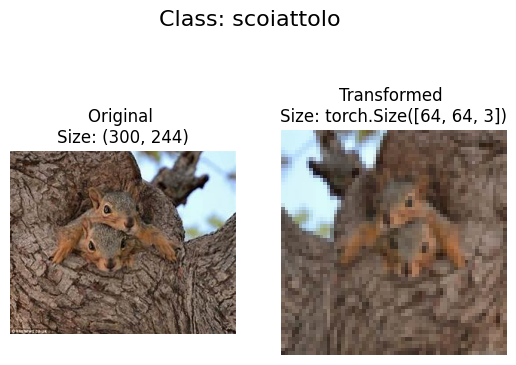

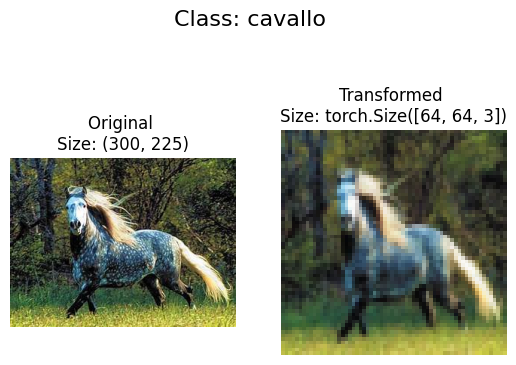

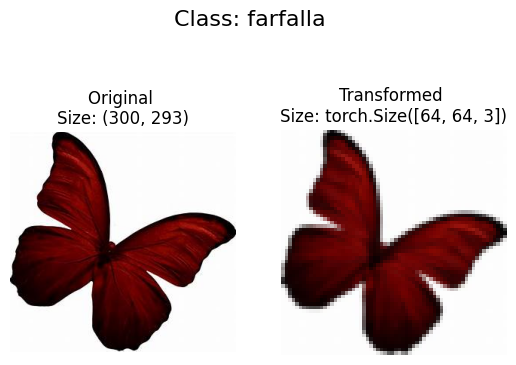

In [ ]:

def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=10)

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
# Setup path for target directory
#target_directory = train_dir
#print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path))])
filtered_class_names = [item for item in class_names_found if not item.startswith(".")]
print(f"Class names found: {filtered_class_names}")

Class names found: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [ ]:
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.

    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))

    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    filtered_classes = [item for item in classes if not item.startswith(".")]
    # 2. Raise an error if class names not found
    if not filtered_classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(filtered_classes)}
    return filtered_classes, class_to_idx

In [ ]:
find_classes(image_path)

(['cane',
  'cavallo',
  'elefante',
  'farfalla',
  'gallina',
  'gatto',
  'mucca',
  'pecora',
  'ragno',
  'scoiattolo'],
 {'cane': 0,
  'cavallo': 1,
  'elefante': 2,
  'farfalla': 3,
  'gallina': 4,
  'gatto': 5,
  'mucca': 6,
  'pecora': 7,
  'ragno': 8,
  'scoiattolo': 9})

In [ ]:
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:

        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.*")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)

    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [ ]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir=image_path,
                                      transform=train_transforms)

In [ ]:
len(train_data_custom)

26179

In [ ]:
class_names=train_data_custom.classes

In [ ]:
train_data_custom.class_to_idx

{'cane': 0,
 'cavallo': 1,
 'elefante': 2,
 'farfalla': 3,
 'gallina': 4,
 'gatto': 5,
 'mucca': 6,
 'pecora': 7,
 'ragno': 8,
 'scoiattolo': 9}

In [ ]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

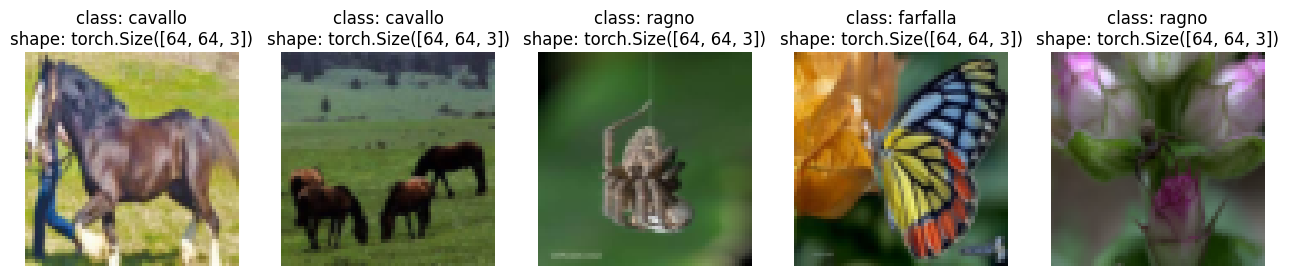

In [ ]:
display_random_images(train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=None)